In [1]:
install.packages('nycflights13')

package 'nycflights13' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pablo\AppData\Local\Temp\RtmpyYcz9l\downloaded_packages


# **03 - Flights Dataset**
___

#### **Autor/es:**
- Peitsch, Pablo [[1]](#1)

**Fecha:** 2022-09-06

In [2]:
library(tidyverse)
library(tidyr)
library(nycflights13)
library(ggridges)
library(reshape2)
# Cambia tamaño del plot
options(repr.plot.width=25, repr.plot.height=12)

#flights <- flights %>% filter_if(~is.numeric(.), all_vars(!is.infinite(.)))
flights <- flights %>% filter_all(all_vars(!is.infinite(.)))
#flights <- flights[!is.infinite(rowSums(flights)),]

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.8     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.1
v readr   2.1.2     v forcats 0.5.2
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [3]:
head(flights, 5)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [4]:
flights_grouped <- summarise(flights, .groups="month", month, dep_delay, arr_delay, carrier)
months_ = unique(month.abb[sort(flights_grouped$month)])
carriers_ = unique(sort(flights_grouped$carrier))

#### Se estudian debajo las demoras en despegue y arribo en función del mes.

In [5]:
flights_melted_1 <- subset(flights_grouped, select= -c(carrier)) %>% melt(id="month")
flights_grouped_month <- group_by(flights_melted_1, variable)

Warning message:
"Removed 17685 rows containing non-finite values (stat_boxplot)."


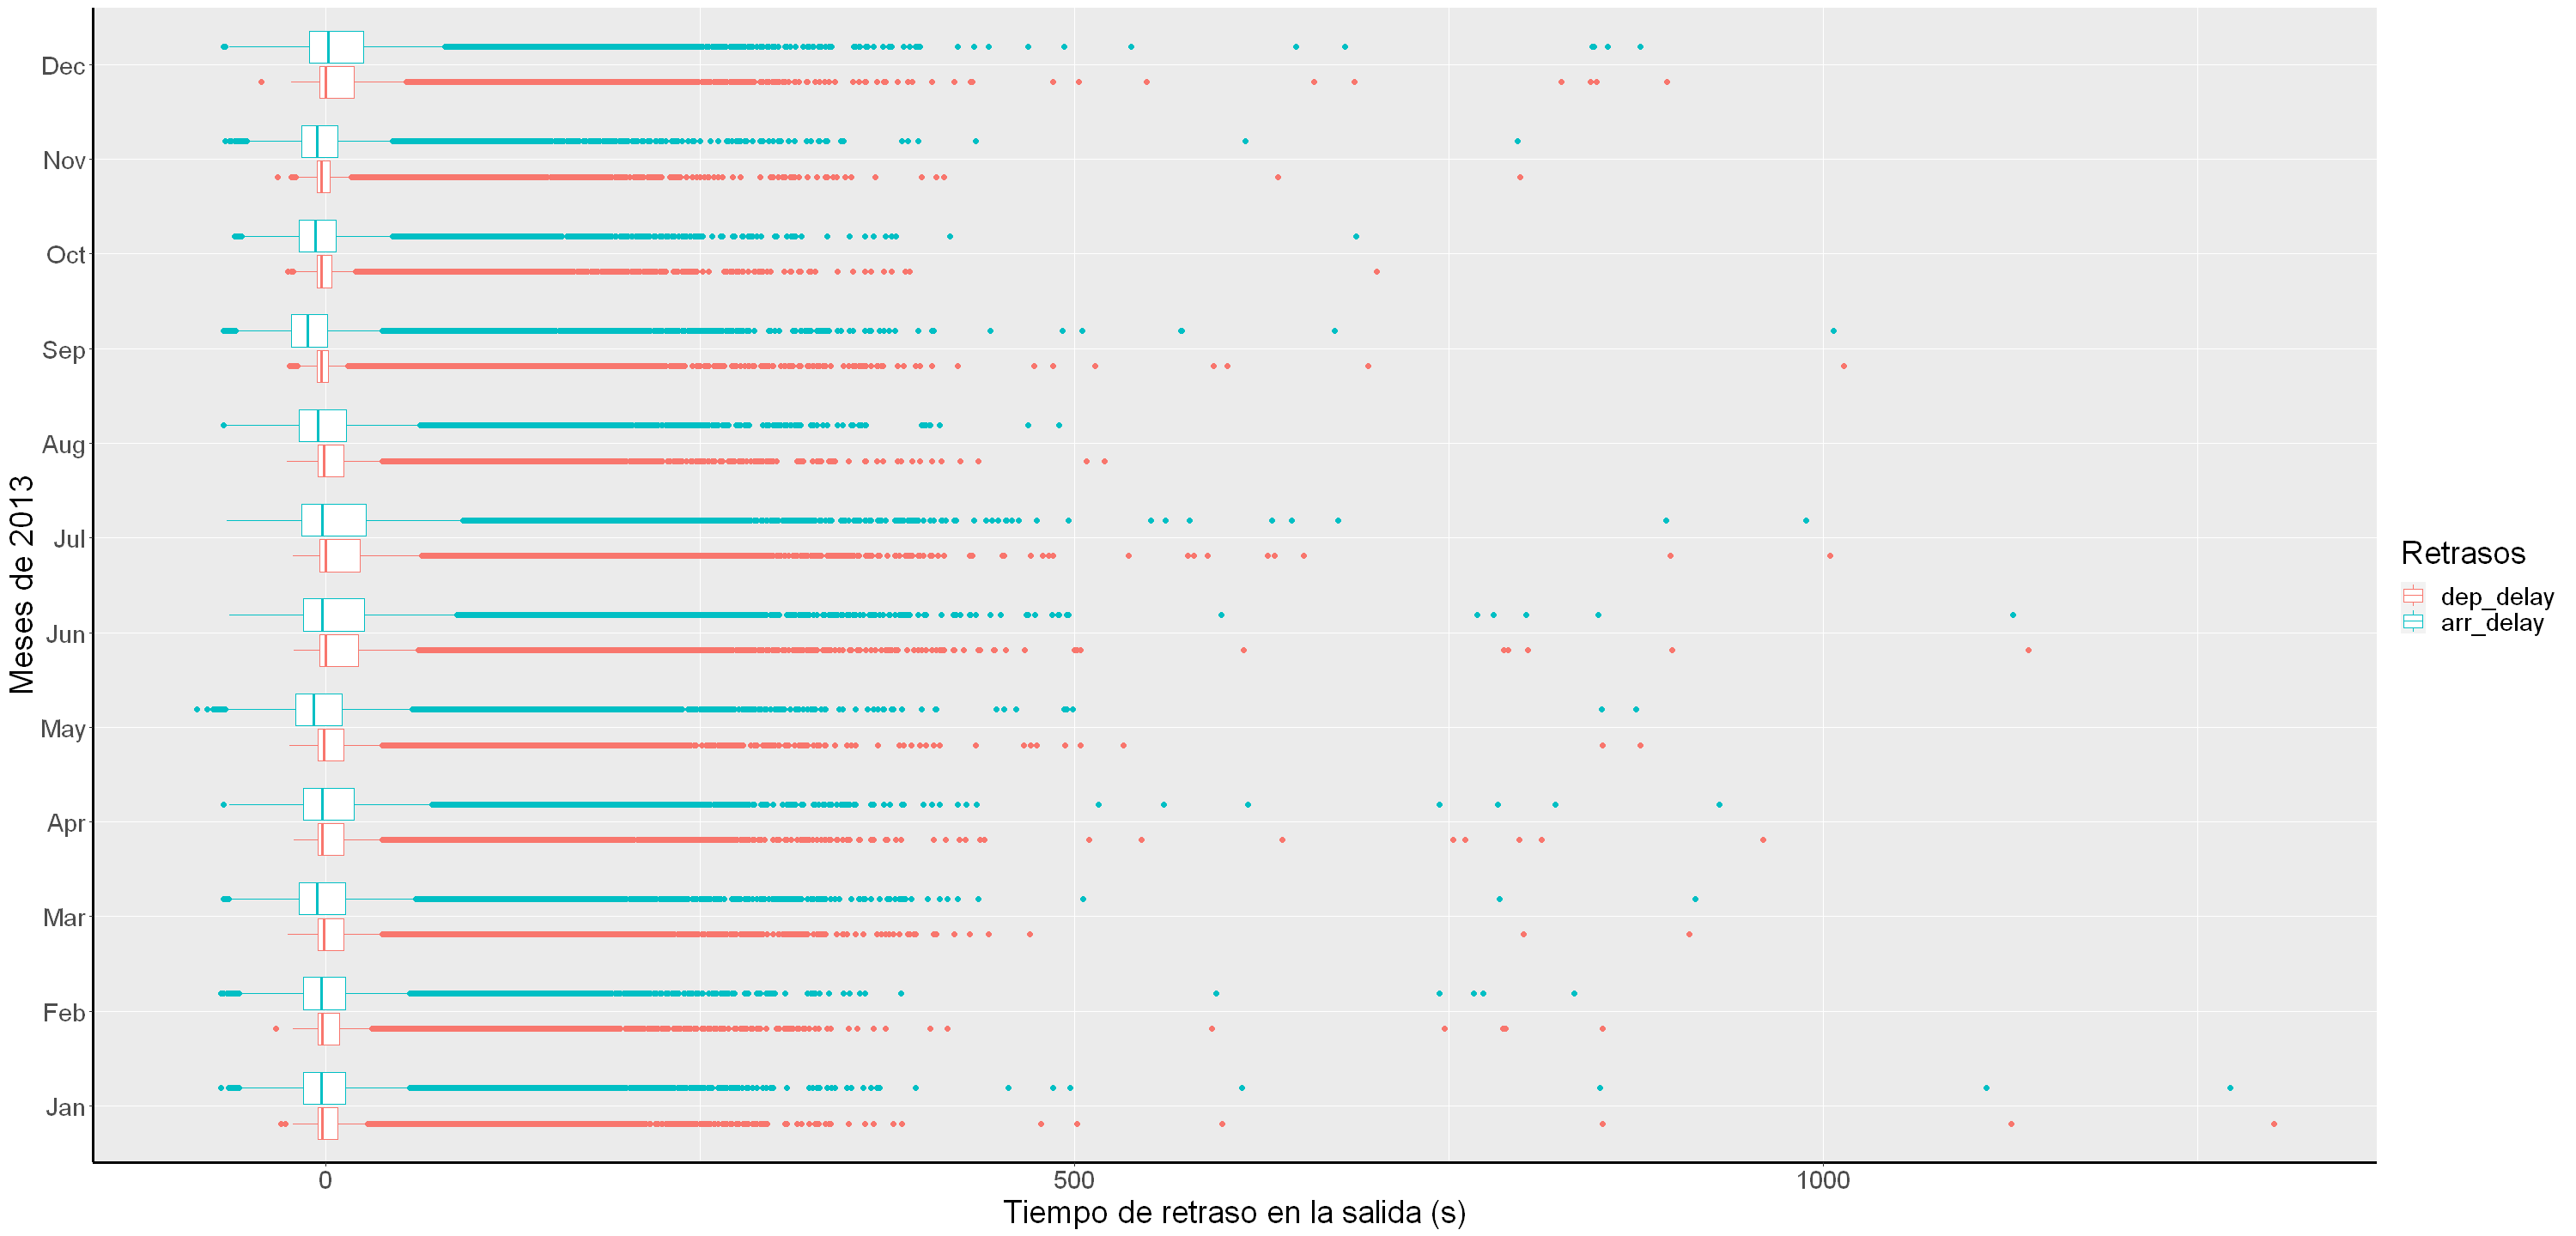

In [6]:
ggplot(data=flights_grouped_month,
       aes(
           x=value,
           y=factor(month),
           color=factor(variable)
       )) +
    # Colores y forma del boxplot
    geom_boxplot() +

    labs(
        x = 'Tiempo de retraso en la salida (s)',
        #title = 'Distribución por mes de retraso de vuelos en 2013',
        color = 'Retrasos'
        ) +
    #scale_color_discrete(label=months_) +
    scale_y_discrete('Meses de 2013', label=months_) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 22))
    #geom_jitter(width=0.1, alpha=0.2, color=factor(flights_grouped$month))

#### ***Figura 1.*** Distribución del retraso en la partida y el arribo de los vuelos en los meses del año 2013.

In [7]:
flights_melted_2 <- subset(flights_grouped, select= -c(month)) %>% melt(id="carrier")
flights_grouped_carrier <- group_by(flights_melted_2, variable)

#### En principio, pareciera que los retrasos se dan mayormente en algunos meses que en otros. Se compara, a continuación, las demoras en despegue y arribo para las distintas aerolineas.

Warning message:
"Removed 17685 rows containing non-finite values (stat_boxplot)."


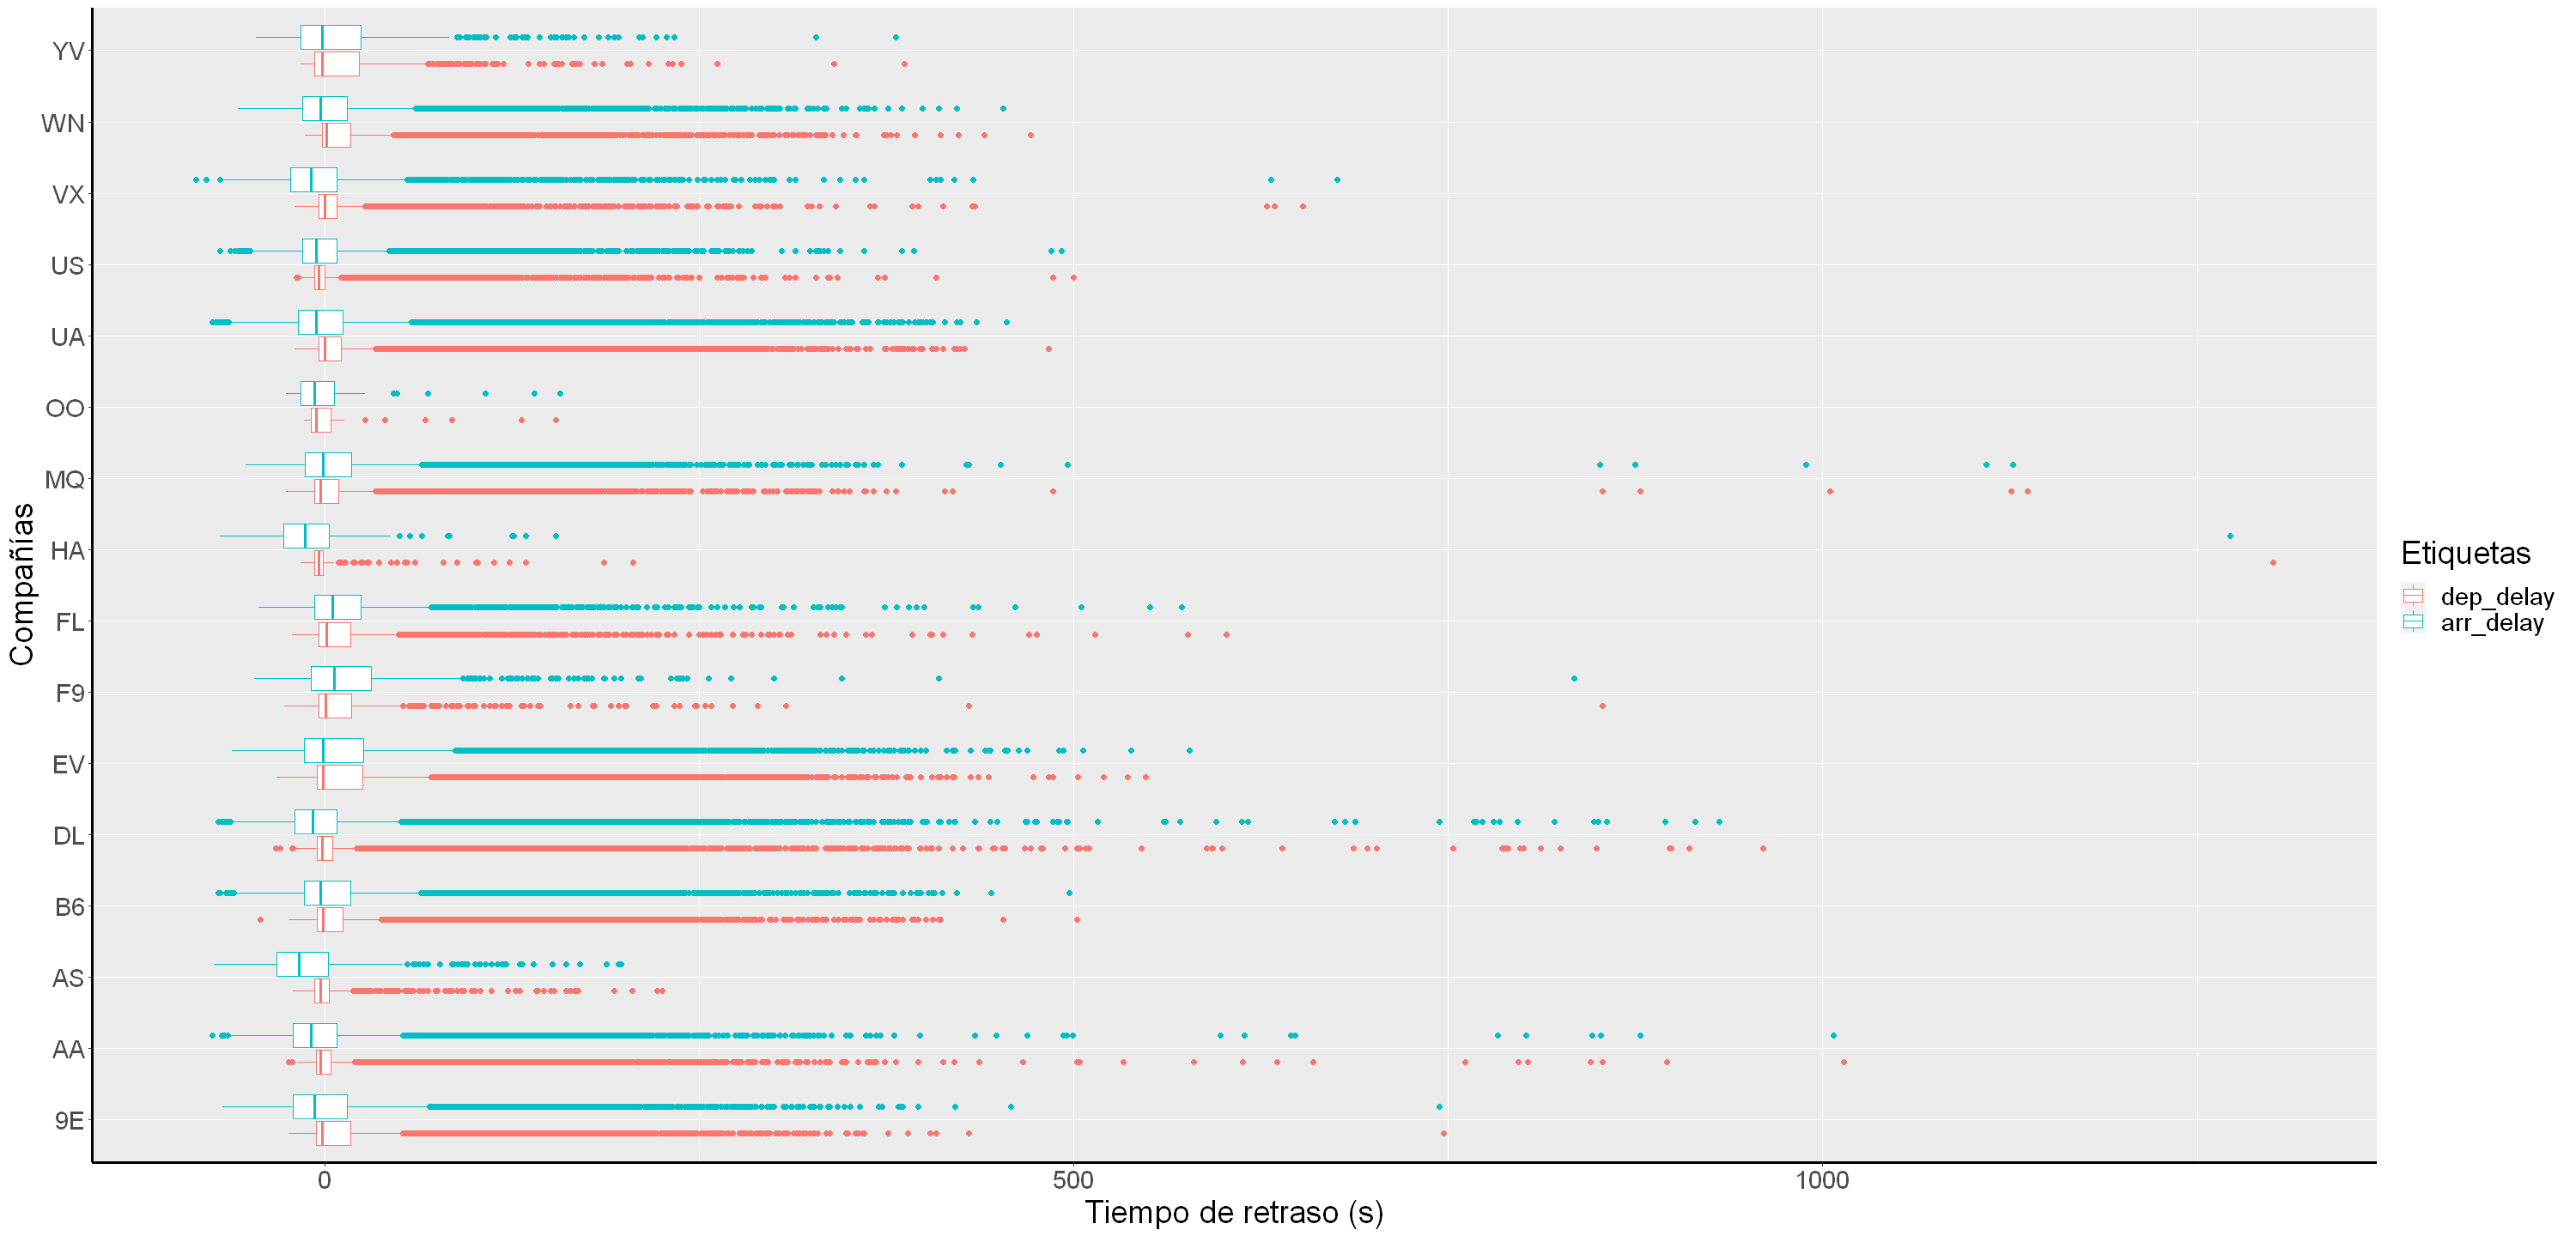

In [8]:
ggplot(data=flights_grouped_carrier,
       aes(
           x=value,
           y=factor(carrier),
           color=factor(variable)
       )) +
    # Colores y forma del boxplot
    geom_boxplot() +

    labs(
        x = 'Tiempo de retraso (s)',
        #title = 'Distribución por mes de retraso de vuelos en 2013',
        color = 'Etiquetas'
        ) +
    #scale_color_discrete(label=months_) +
    scale_y_discrete('Compañías', label=carriers_) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 22))

#### ***Figura 2.*** Distribución del retraso en partidas y arribos de los vuelos para las distintas compañías en el año 2013.

#### Se puede obserbar en la Fig. 2, que los retrasos predominan en algunas aerolíneas más que en otras. Intentamos evaluar si hay retrasos por aerolineas en algún mes en particular.

In [9]:
flights_melted_3 <- melt(flights_grouped, id=c("carrier", "month"))
flights_grouped_ <- group_by(flights_melted_3, month)

Warning message:
"Removed 17685 rows containing non-finite values (stat_boxplot)."


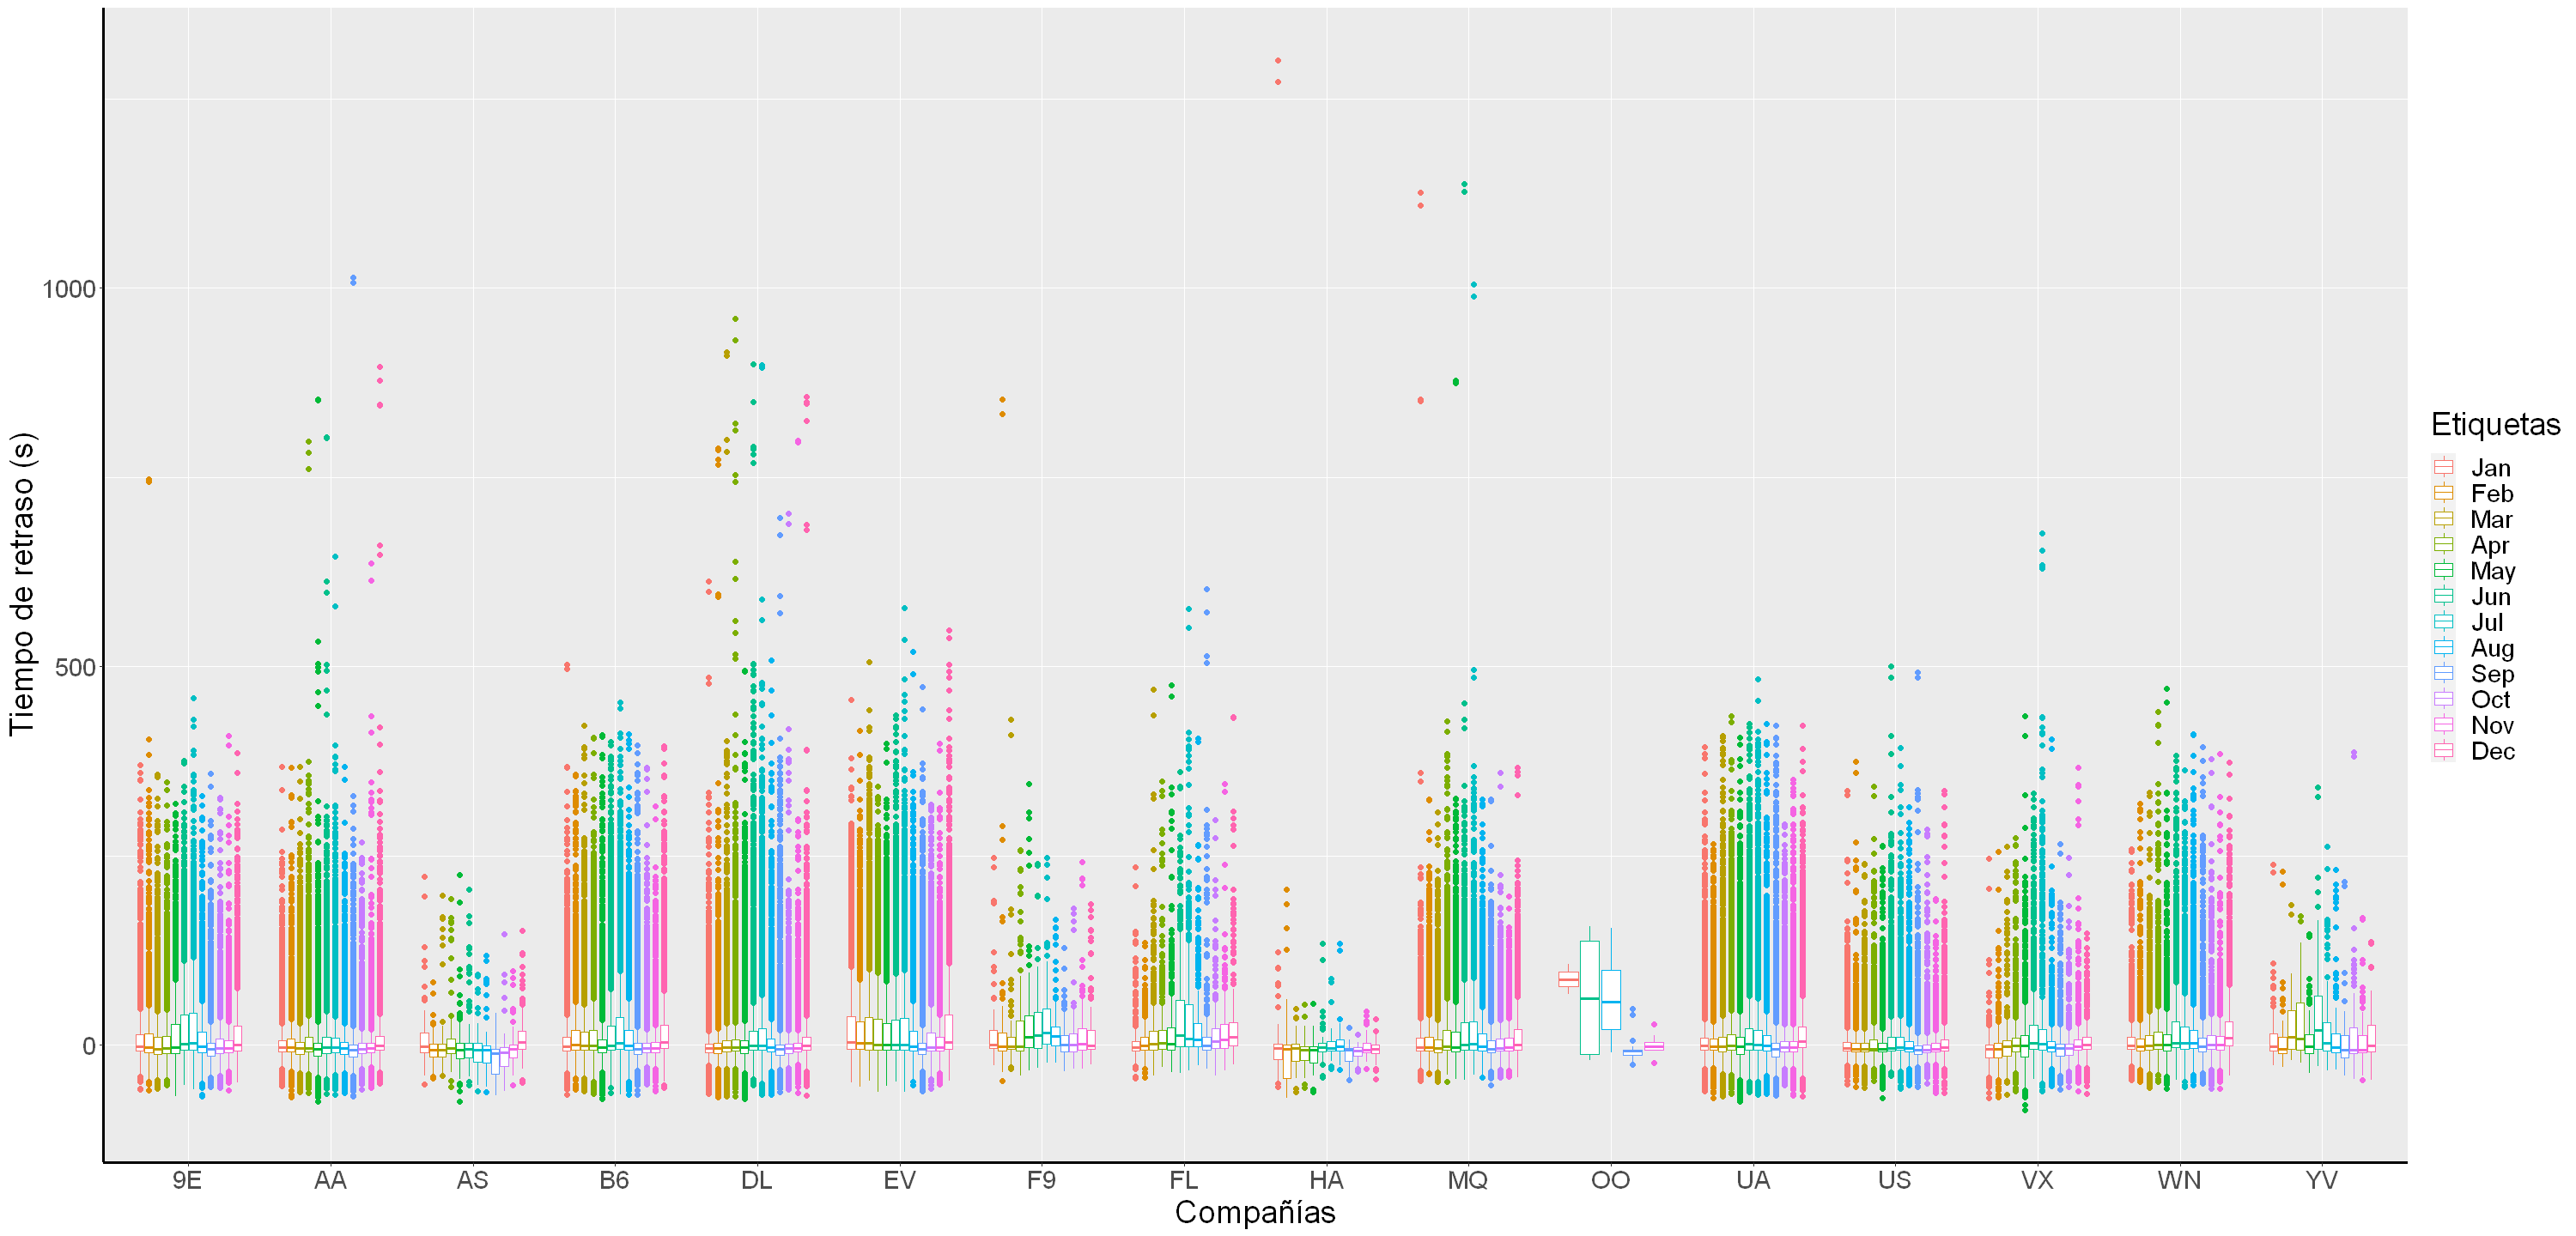

In [10]:
ggplot(data=flights_grouped_,
       aes(
           x=factor(carrier),
           y=value,
           color=factor(month)
       )) +
    # Colores y forma del boxplot
    geom_boxplot() +
    labs(
        x = 'Compañías',
        #title = 'Distribución por mes de retraso de vuelos en 2013',
        color = 'Etiquetas'
        ) +
    scale_color_discrete(label=months_) +
    scale_y_continuous('Tiempo de retraso (s)') +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 22))

#### ***Figura 3.*** Distribución del retraso en partidas y arribos de los vuelos para las distintas compañías en el año 2013, evaluados epor mes.

#### Se puede observar claramente que algunas presentan pocos retrasos, así como otras retrasos importantes, predominando particularmente en algunos meses. Aún así, se hace difícil observar esto en un gráfico demasiado cargado. Por lo que es conveniente, quizás, realizar el análisis por aerolíneas.

In [11]:
flights_reduced <- filter(flights_grouped_, carrier==c('AS', 'FL', 'YV'))

Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"
Warning message in carrier == c(

Warning message:
"Removed 93 rows containing non-finite values (stat_boxplot)."


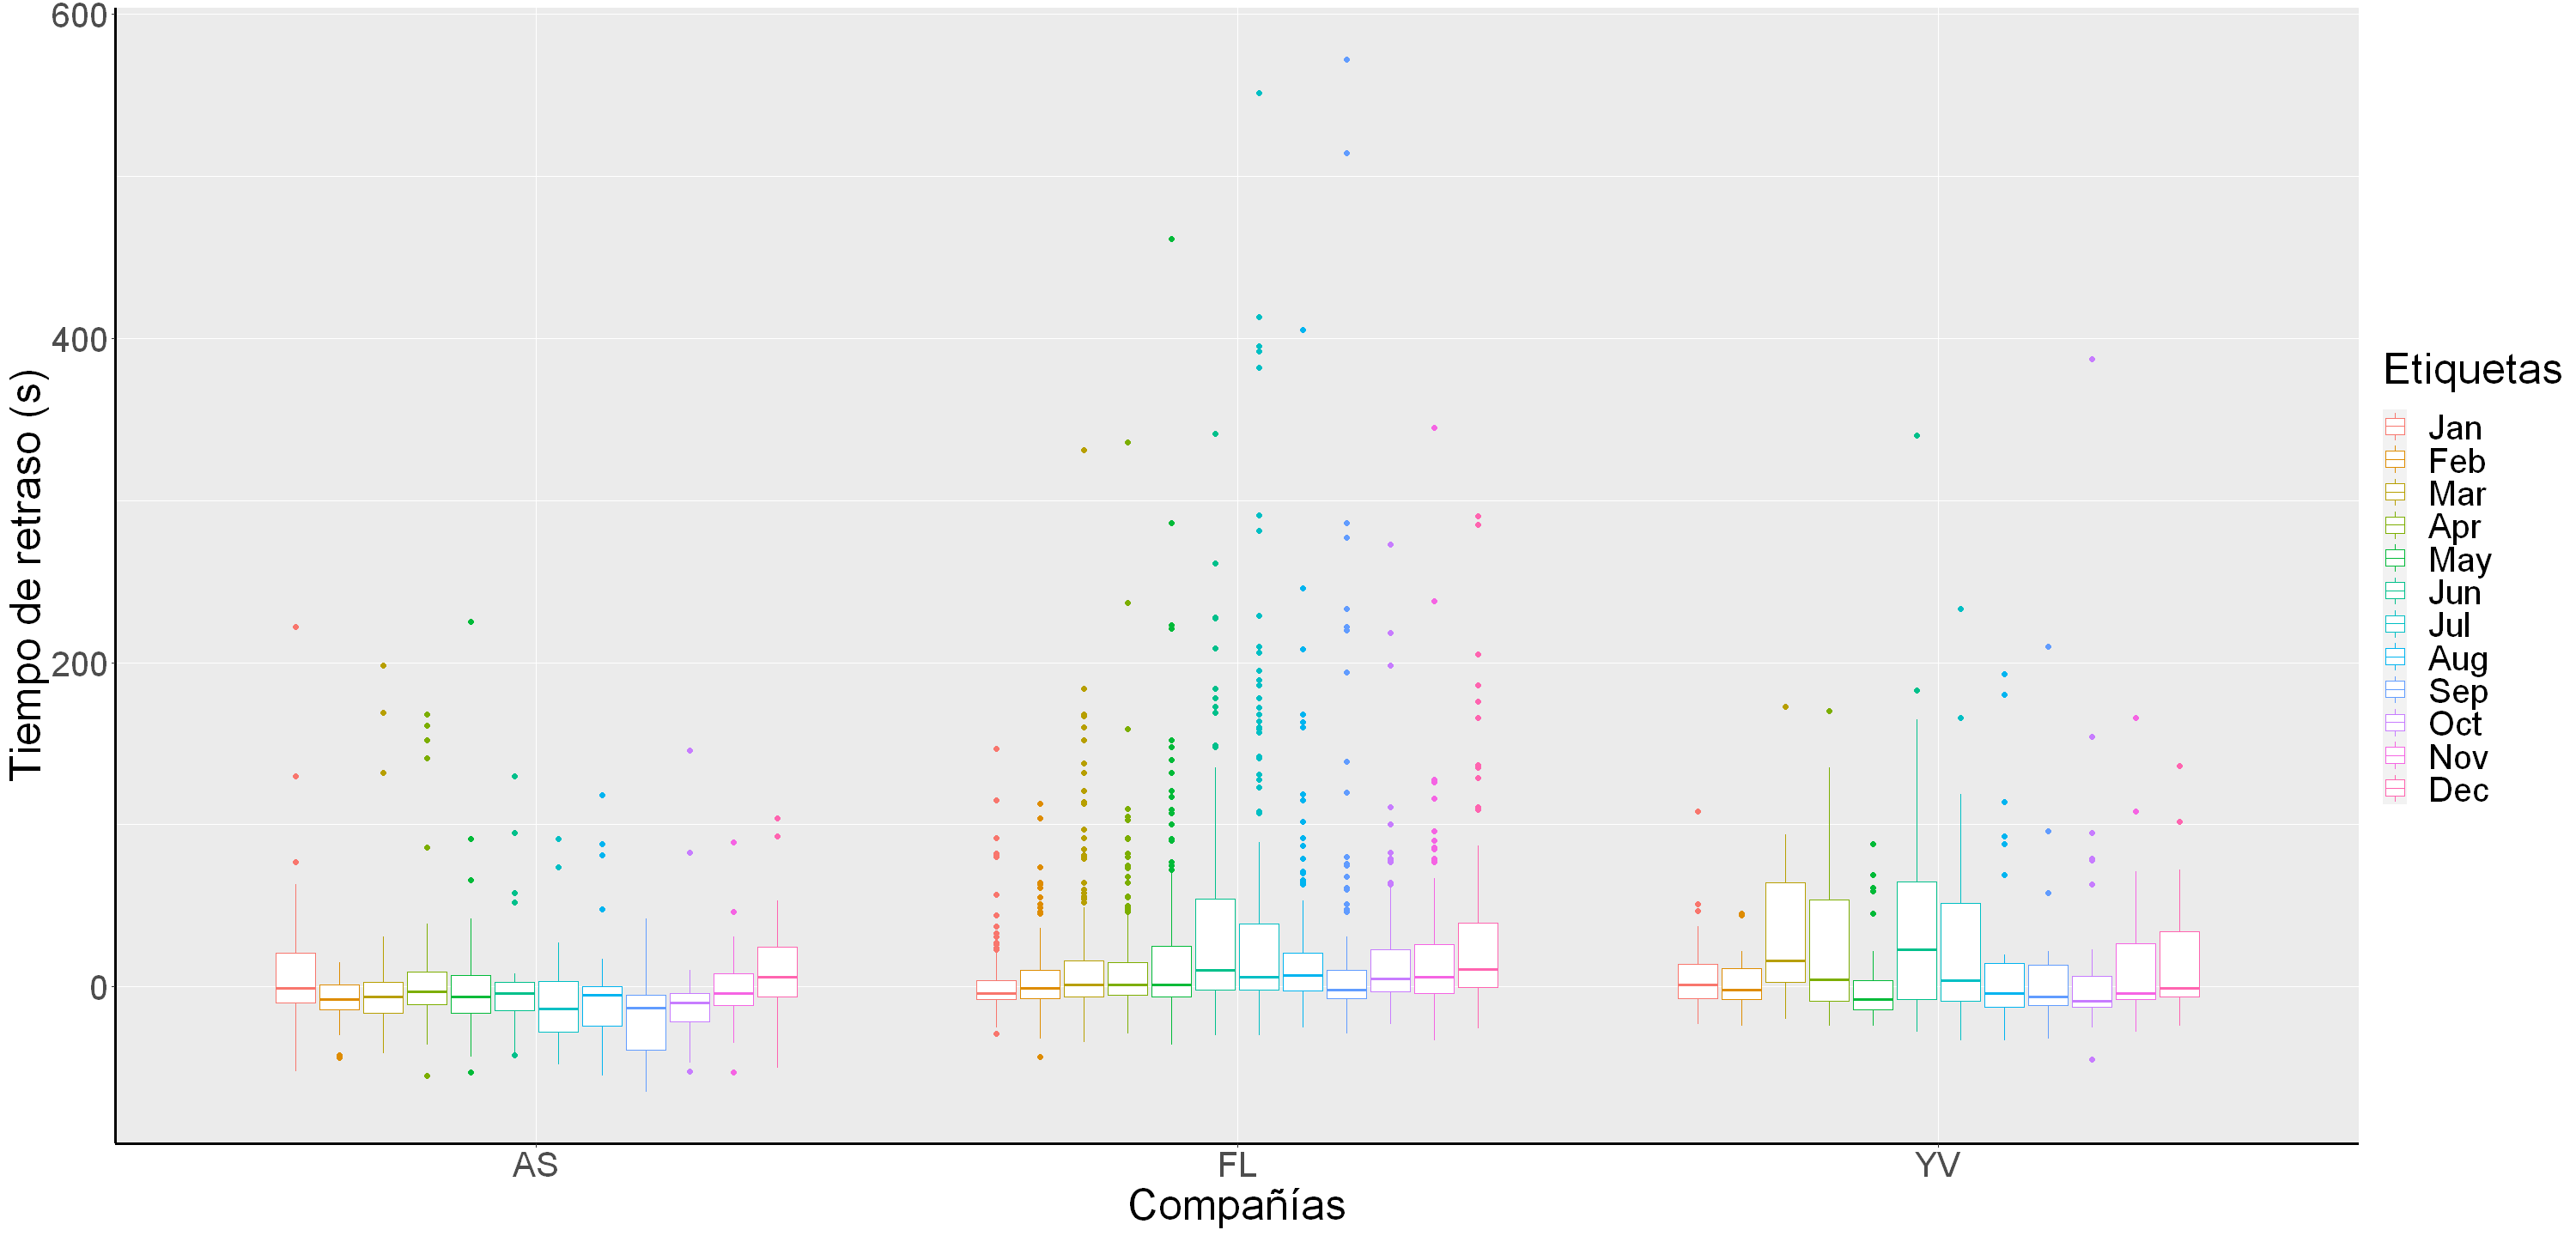

In [12]:
ggplot(data=flights_reduced,
       aes(
           x=factor(carrier),
           y=value,
           color=factor(month)
       )) +
    # Colores y forma del boxplot
    geom_boxplot() +
    labs(
        x = 'Compañías',
        #title = 'Distribución por mes de retraso de vuelos en 2013',
        color = 'Etiquetas'
        ) +
    scale_color_discrete(label=months_) +
    scale_y_continuous('Tiempo de retraso (s)') +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 30))

### **Datos:**

#### <a id="1"></a> Pablo Peitsch
#### Podes enviarme un correo [acá](mailto:pablo.r.peitsch@gmail.com)
#### También encontrar mis repositorios de Github: <a href="https://github.com/PPeitsch">@PPeitsch</a>